In [7]:
import numpy as np
import matplotlib.pyplot as plt


# wave velocity
wave_velocity = 1
#Range and number of nodes
x_min, x_max, size_dx = 0, 1, 100
t_min, t_max, size_dt = 0, 2, 300
x_list = np.linspace(x_min, x_max, size_dx)
t_list = np.linspace(t_min, t_max, size_dt)

# Calculate unit time and unit distance
dx = (x_max - x_min) / (size_dx - 1)
dt = (t_max - t_min) / (size_dt - 1)
#Recording iteration times
time_step=1

u = np.zeros((size_dx,size_dt))
C2=(wave_velocity * dt / dx) ** 2

#According to formula, compute the positions of the points of the wave at time t=0 and time t=1  
for i in range(0,len(x_list)):
    # value of each point when t = 0 
    u[i][0] = np.sin(3 * np.pi * x_list[i])
for i in range(1,len(x_list)-1):
    # tvalue of each point when t = 1 
    u[i][1] = u[i][0] - 1 / 2 * C2 * (u[i + 1][0] - 2 * u[i][0] + u[i - 1][0])
#Can't compute the top and bottom values, so set it to 0
u[0][1]=0
u[-1][1]=0

while t_list[time_step] < t_max:
    #Gets the value at each point at the current time
    u_now = u[:, time_step]
    #According to formulae,calculate the value of each point at the next time
    end = len(u_now) - 1
    ddu = list(u_now[0: end - 1] - 2 * u_now[1: end] + u_now[2: end + 1])
    ddu = np.array([0] + ddu + [0])
    
    u[:, time_step + 1] = C2 * ddu + 2 * u[:, time_step] - u[:, time_step - 1]
    time_step += 1
    #Can't compute the top and bottom values, so set it to 0
    u[0][time_step] = 0
    u[-1][time_step] = 0




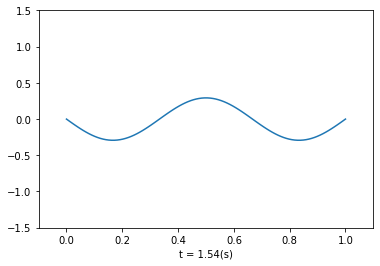

In [23]:
#Fixed the scale of the coordinate axes
Max = np.max(u)
plt.axis((x_min - x_max / 10, x_max + x_max / 10, -1.5 * Max, 1.5 * Max))
#set label
#set i to displays the image at a certain time(i<size_dt)
i=230
plt.xlabel("t = {:.2f}(s)".format(t_list[i]))

plt.plot(x_list, u[:, i])
plt.show()

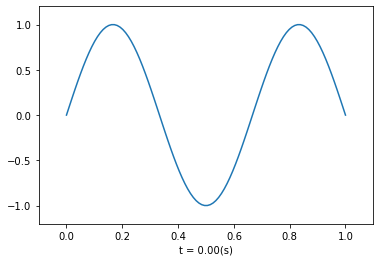

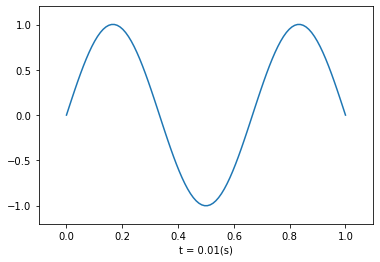

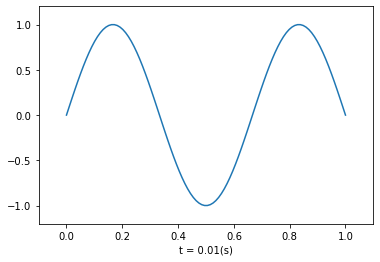

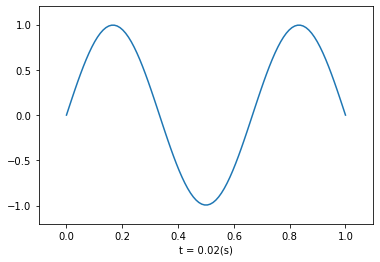

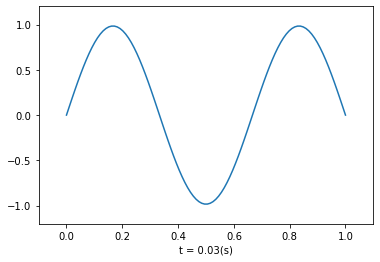

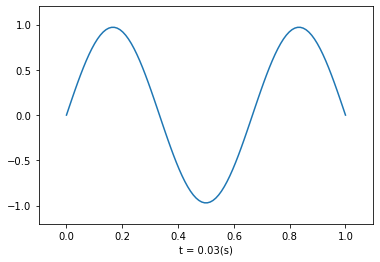

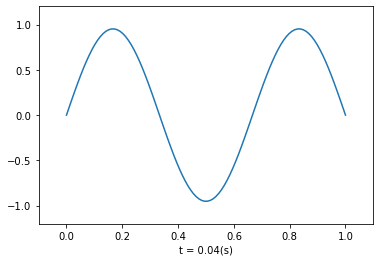

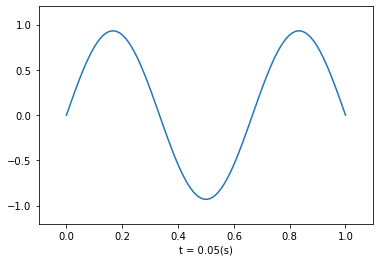

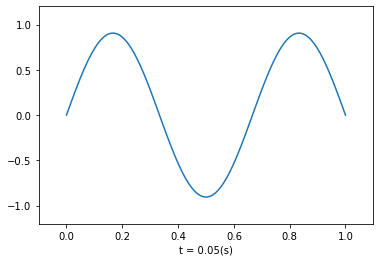

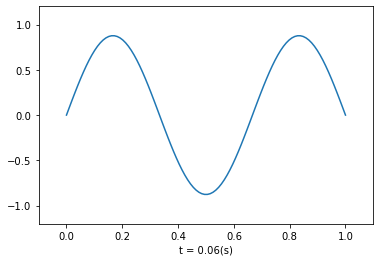

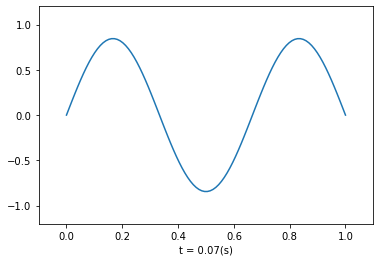

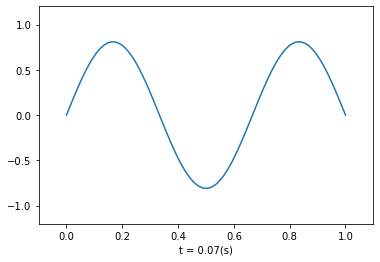

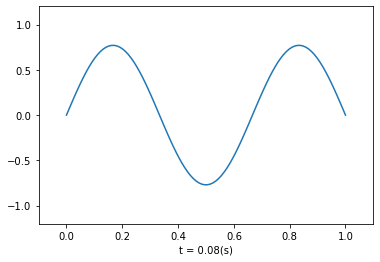

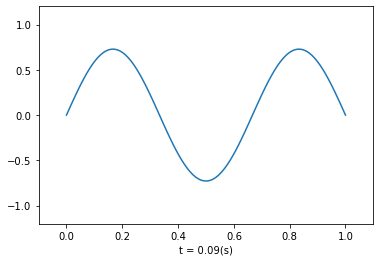

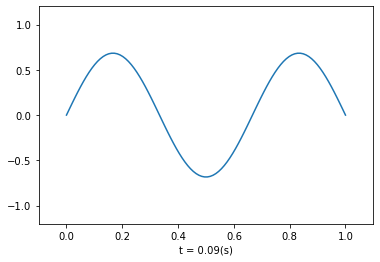

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [24]:
#Display the iteration process GIF
for i in range(size_dt):
        plt.clf()
        plt.plot(x_list, u[:, i])
        plt.axis((x_min - x_max / 10, x_max + x_max / 10, -1.2 * Max, 1.2 * Max))
        plt.xlabel("t = {:.2f}(s)".format(t_list[i]))
        plt.pause(dt / 2)
plt.show()